In [ ]:
#指定された期間「2023年6月12日から2023年6月16日」の「順立装置出庫日時」に基づくかんばん枚数をフィルタリングしてグラフに表示します。

/anaconda/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


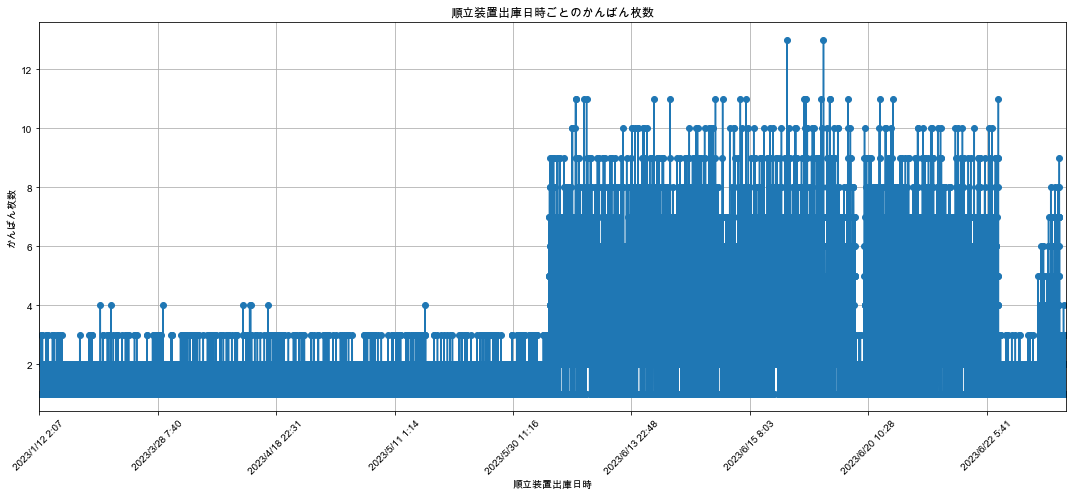

In [17]:
import pandas as pd

# 'shift-jis'エンコーディングでファイルを読み込む
data_shift_jis = pd.read_csv("sample1.csv", encoding='shift-jis')

# 最初の5行を表示してデータの内容を確認する
data_shift_jis.head()

# '順立装置出庫日時'カラムを基にかんばんの枚数を集計
kanban_counts = data_shift_jis['順立装置出庫日時'].value_counts().sort_index()

# 集計結果の最初の5行を表示
kanban_counts.head()

import matplotlib.pyplot as plt

# グラフを描画
plt.figure(figsize=(15, 7))
kanban_counts.plot(kind='line', marker='o')
plt.title('順立装置出庫日時ごとのかんばん枚数')
plt.xlabel('順立装置出庫日時')
plt.ylabel('かんばん枚数')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

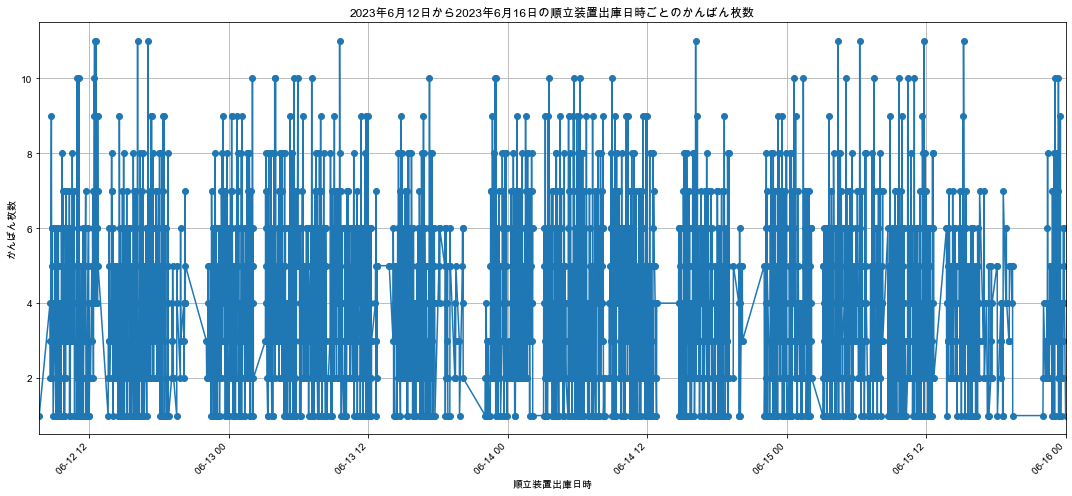

In [18]:
# '順立装置出庫日時'カラムを日時型に変換
data_shift_jis['順立装置出庫日時'] = pd.to_datetime(data_shift_jis['順立装置出庫日時'])

# 指定された期間のデータをフィルタリング
filtered_data = data_shift_jis[(data_shift_jis['順立装置出庫日時'] >= '2023-06-12') & 
                               (data_shift_jis['順立装置出庫日時'] <= '2023-06-16')]

# フィルタリングしたデータからかんばん枚数を集計
filtered_kanban_counts = filtered_data['順立装置出庫日時'].value_counts().sort_index()

# グラフを描画
plt.figure(figsize=(15, 7))
filtered_kanban_counts.plot(kind='line', marker='o')
plt.title('2023年6月12日から2023年6月16日の順立装置出庫日時ごとのかんばん枚数')
plt.xlabel('順立装置出庫日時')
plt.ylabel('かんばん枚数')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


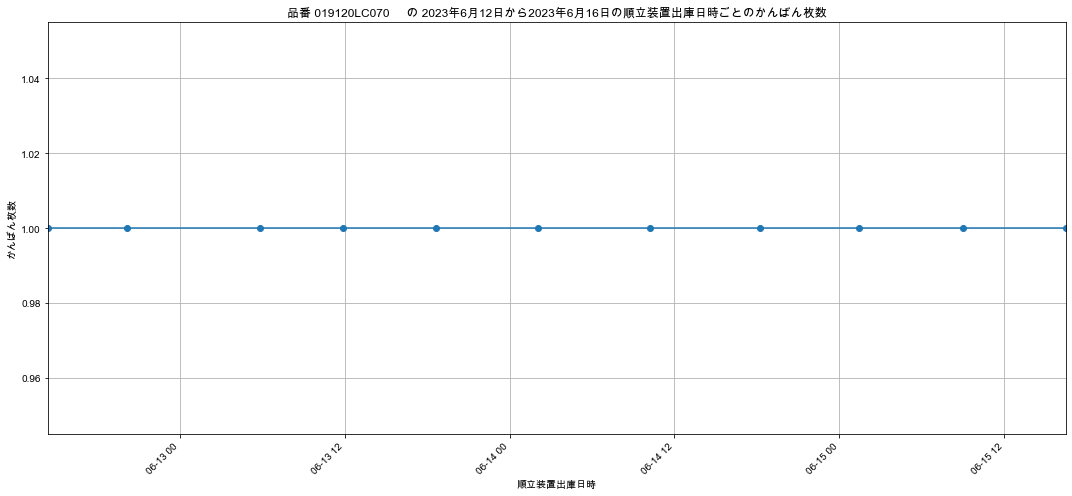

2023-06-12 14:22:00    1
2023-06-12 20:10:00    1
2023-06-13 05:50:00    1
2023-06-13 11:53:00    1
2023-06-13 18:40:00    1
2023-06-14 02:04:00    1
2023-06-14 10:12:00    1
2023-06-14 18:12:00    1
2023-06-15 01:26:00    1
2023-06-15 08:59:00    1
2023-06-15 16:29:00    1
Name: 順立装置出庫日時, dtype: int64


In [30]:
# データ内の品番の一覧を取得
unique_item_numbers = data_shift_jis['品番'].dropna().unique()

# 品番の一覧の中からランダムに1つ選択
import numpy as np
selected_item_number = np.random.choice(unique_item_numbers)
selected_item_number
#selected_item_number = "41310ECB010  "

# 選択した品番でデータをフィルタリング
filtered_data_by_item = data_shift_jis[
    (data_shift_jis['順立装置出庫日時'] >= '2023-06-12') & 
    (data_shift_jis['順立装置出庫日時'] <= '2023-06-16') &
    (data_shift_jis['品番'] == selected_item_number)
]

# フィルタリングしたデータからかんばん枚数を集計
filtered_kanban_counts_by_item = filtered_data_by_item['順立装置出庫日時'].value_counts().sort_index()

# グラフを描画
plt.figure(figsize=(15, 7))
filtered_kanban_counts_by_item.plot(kind='line', marker='o')
plt.title(f'品番 {selected_item_number} の 2023年6月12日から2023年6月16日の順立装置出庫日時ごとのかんばん枚数')
plt.xlabel('順立装置出庫日時')
plt.ylabel('かんばん枚数')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(filtered_kanban_counts_by_item)

In [32]:
# 品番「9056451A087」に関するデータをフィルタリング
item_specific_data = data_shift_jis[data_shift_jis['品番'] == selected_item_number]

# 「順立装置出庫日時」をソート
sorted_dates = item_specific_data['順立装置出庫日時'].sort_values()

# 前後の「順立装置出庫日時」の時間差を計算
time_diffs = sorted_dates.diff().dropna()
print(time_diffs)

# 時間差の平均を計算
average_time_diff = time_diffs.mean()

average_time_diff

58858   0 days 06:42:00
58550   2 days 06:41:00
55707   0 days 05:48:00
54778   0 days 09:40:00
56410   0 days 06:03:00
50960   0 days 06:47:00
51206   0 days 07:24:00
52994   0 days 08:08:00
51040   0 days 08:00:00
47860   0 days 07:14:00
47706   0 days 07:33:00
48282   0 days 07:30:00
44187   0 days 08:22:00
44719   0 days 06:39:00
42808   0 days 08:33:00
42640   0 days 11:06:00
1360    2 days 06:49:00
2025    0 days 06:52:00
1174    0 days 12:15:00
3317    0 days 06:28:00
2456    0 days 11:24:00
3913    0 days 06:58:00
1600    0 days 05:45:00
2793    0 days 12:37:00
4655    0 days 06:41:00
Name: 順立装置出庫日時, dtype: timedelta64[ns]


Timedelta('0 days 11:45:33.600000')

In [33]:
# 全体のデータから指定された期間と品番「9056451A087」でフィルタリング
item_specific_data_period = data_shift_jis[
    (data_shift_jis['順立装置出庫日時'] >= '2023-06-12') & 
    (data_shift_jis['順立装置出庫日時'] <= '2023-06-16') &
    (data_shift_jis['品番'] == selected_item_number)
]

# 「順立装置出庫日時」をソート
sorted_dates_specific_period = item_specific_data_period['順立装置出庫日時'].sort_values()

# 前後の「順立装置出庫日時」の時間差を計算
time_diffs_specific_period = sorted_dates_specific_period.diff().dropna()

# 時間差の平均を計算
average_time_diff_specific_period = time_diffs_specific_period.mean()

average_time_diff_specific_period


Timedelta('0 days 07:24:42')